In [226]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from gzreduction.vote_sources.panoptes_exports import export_to_responses
from gzreduction.vote_sources.panoptes_exports import aggregate
from gzreduction.schemas.judges_schema import judges_schema

In [228]:

schema = judges_schema

In [229]:
date_str = '2024_11_02'

In [230]:
classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/judges/lenses-classifications_' + date_str + '.csv'
aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/judges/lenses_reduced_votes_' + date_str + '.csv'

In [231]:
# nrows = 10000
nrows = None
clf = pd.read_csv(classification_export_loc, nrows=nrows)
clf

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,595045755,Tom_Collett,1243762,02d05e6ea7bffd9efffc,27648,Lenses,8.23,2024-10-30 20:36:26 UTC,NaN,NaN,"{""source"":""api"",""session"":""1acb5e134f264c9cbed...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104312369"":{""retired"":{""id"":134863733,""workf...",104312369
1,595045813,Tom_Collett,1243762,02d05e6ea7bffd9efffc,27648,Lenses,8.23,2024-10-30 20:36:39 UTC,NaN,NaN,"{""source"":""api"",""session"":""1acb5e134f264c9cbed...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104311918"":{""retired"":{""id"":134862524,""workf...",104311918
2,595045827,Tom_Collett,1243762,02d05e6ea7bffd9efffc,27648,Lenses,8.23,2024-10-30 20:36:43 UTC,NaN,NaN,"{""source"":""api"",""session"":""1acb5e134f264c9cbed...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104311965"":{""retired"":{""id"":134862760,""workf...",104311965
3,595045846,Tom_Collett,1243762,02d05e6ea7bffd9efffc,27648,Lenses,8.23,2024-10-30 20:36:47 UTC,NaN,NaN,"{""source"":""api"",""session"":""1acb5e134f264c9cbed...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104312299"":{""retired"":{""id"":134864109,""workf...",104312299
4,595046032,Tom_Collett,1243762,a3915bd2e552d854dd26,27648,Lenses,8.23,2024-10-30 20:37:30 UTC,NaN,NaN,"{""source"":""api"",""session"":""1acb5e134f264c9cbed...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104312156"":{""retired"":{""id"":134862950,""workf...",104312156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,595669140,ThaiTran,2759806,311c9b87c3b2b9b632de,27648,Lenses,8.23,2024-11-02 15:29:50 UTC,NaN,NaN,"{""source"":""api"",""session"":""927f6ccf18c987ee92a...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104311935"":{""retired"":{""id"":134862561,""workf...",104311935
2870,595669156,ThaiTran,2759806,311c9b87c3b2b9b632de,27648,Lenses,8.23,2024-11-02 15:29:55 UTC,NaN,NaN,"{""source"":""api"",""session"":""927f6ccf18c987ee92a...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104311987"":{""retired"":{""id"":134862832,""workf...",104311987
2871,595669212,ThaiTran,2759806,311c9b87c3b2b9b632de,27648,Lenses,8.23,2024-11-02 15:30:11 UTC,NaN,NaN,"{""source"":""api"",""session"":""927f6ccf18c987ee92a...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104311995"":{""retired"":{""id"":134862755,""workf...",104311995
2872,595669226,ThaiTran,2759806,43ccc357bd8aed856c06,27648,Lenses,8.23,2024-11-02 15:30:14 UTC,NaN,NaN,"{""source"":""api"",""session"":""927f6ccf18c987ee92a...","[{""task"":""T0"",""task_label"":""Is this a strong l...","{""104311932"":{""retired"":{""id"":134862739,""workf...",104311932


In [232]:
clf['annotations'].iloc[0]

'[{"task":"T0","task_label":"Is this a strong lens?","value":"Not a lens, not interesting"}]'

In [233]:
clf['user_name'].value_counts()

user_name
joshwilde       537
kiaraspin       535
byc             486
curiosorus      466
Tom_Collett     235
ThaiTran        145
Krojas26        139
rbmetcalf       137
nhogg           131
MikeWalmsley     46
rpcopen          17
Name: count, dtype: int64

In [234]:
len(clf['user_ip'].unique())

80

In [235]:
len(clf['user_name'].unique())

11

In [236]:
counts_per = clf['user_name'].value_counts()[:40]

(1, 638.1908215931702)

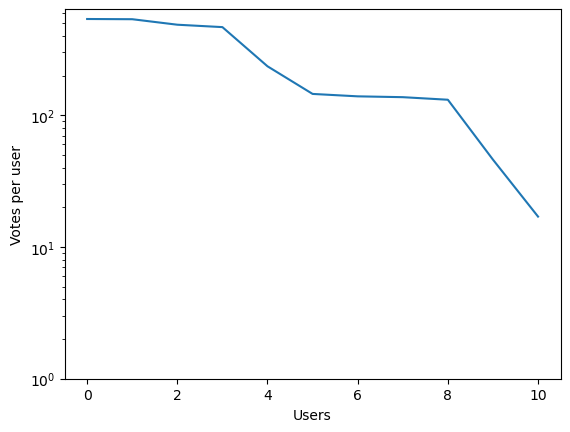

In [237]:

plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).values)
plt.yscale('log')
plt.xlabel('Users')
plt.ylabel('Votes per user')
plt.ylim(1, None)

Text(0, 0.5, 'Cum. votes by those volunteers')

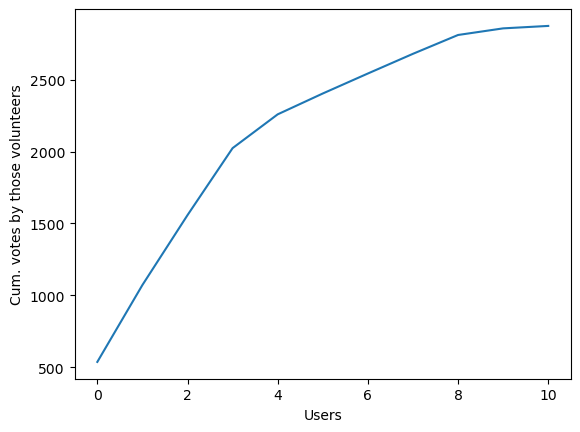

In [238]:

plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).cumsum().values)
# plt.yscale('log')
plt.xlabel('Users')
plt.ylabel('Cum. votes by those volunteers')

In [239]:
def get_euclid_subject_id(subject_data):
    loaded = json.loads(subject_data)
    print(loaded)
    inner_dict = loaded[list(loaded.keys())[0]]
    if '!filename' in inner_dict:
        return inner_dict['!filename']
    if 'Filename' in inner_dict:
        return inner_dict['Filename'] 
    raise ValueError(inner_dict)

In [240]:
clf['id_str'] = clf['subject_data'].apply(get_euclid_subject_id)
clf['id_str'] 

{'104312369': {'retired': {'id': 134863733, 'workflow_id': 27648, 'classifications_count': 5, 'created_at': '2024-10-30T20:09:52.289Z', 'updated_at': '2024-10-31T20:19:19.821Z', 'retired_at': '2024-10-31T20:19:19.806Z', 'subject_id': 104312369, 'retirement_reason': 'classification_count'}, '!filename': '175d096d600ace578700607c87a23574b55b60491e6c0e904e6a6365c6269e02', '#campaign': 'euclid_challenge', '#upload_date': '2024-10-30'}}
{'104311918': {'retired': {'id': 134862524, 'workflow_id': 27648, 'classifications_count': 5, 'created_at': '2024-10-30T19:45:19.099Z', 'updated_at': '2024-11-01T18:08:03.219Z', 'retired_at': '2024-11-01T18:08:03.210Z', 'subject_id': 104311918, 'retirement_reason': 'classification_count'}, '!filename': '0c31b5f5037fa90a363dd02ba6a36ee3cc2a2b50f1903a9943afa83f8875c2d3', '#campaign': 'euclid_challenge', '#upload_date': '2024-10-30'}}
{'104311965': {'retired': {'id': 134862760, 'workflow_id': 27648, 'classifications_count': 6, 'created_at': '2024-10-30T19:50:11

0       175d096d600ace578700607c87a23574b55b60491e6c0e...
1       0c31b5f5037fa90a363dd02ba6a36ee3cc2a2b50f1903a...
2       9166a1d728e99f6dfa6eed46e2230c6894b60720ae4722...
3       8c32cca9ad57e7b2a4dc81ebba533f810219d863612efb...
4       4ced8efa7183f6d1eb7b18f0031fb32711f4c65ff5f3f0...
                              ...                        
2869    51b44a240d4caa1ee8d0708f83fecce1b3302db745868e...
2870    f92ca86477218c731245f656a148146aa8b09b3b0b6493...
2871    946b7ddfd6edc9430c653d6967097c260a68e959175a2f...
2872    46555bf2b049feb3f2488f5cda263db40df572071f0390...
2873    87e89f2d57251dbc85d2d9da660ebb1f082404fb88cce8...
Name: id_str, Length: 2874, dtype: object

In [241]:
clf.columns.values

array(['classification_id', 'user_name', 'user_id', 'user_ip',
       'workflow_id', 'workflow_name', 'workflow_version', 'created_at',
       'gold_standard', 'expert', 'metadata', 'annotations',
       'subject_data', 'subject_ids', 'id_str'], dtype=object)

In [242]:
len(clf)

2874

In [243]:

# workflows = [22130]
# clf = clf[clf['workflow_id'].isin(workflows)]
# assert len(clf) > 0

In [244]:
clf['created_at'] = pd.to_datetime(clf['created_at'])

In [245]:
clf['annotations'] = clf['annotations'].apply(json.loads)

In [246]:
clf['annotations'].iloc[0]

[{'task': 'T0',
  'task_label': 'Is this a strong lens?',
  'value': 'Not a lens, not interesting'}]

In [247]:
df = export_to_responses.explode_annotations(clf, exclude_tasks=None)  # now includes T10, rare features, as well
df

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids,workflow_version
0,T0,Is this a strong lens?,"Not a lens, not interesting",175d096d600ace578700607c87a23574b55b60491e6c0e...,1243762,595045755,2024-10-30 20:36:26+00:00,104312369,8.23
1,T0,Is this a strong lens?,Grade C (lens-like features could have other e...,0c31b5f5037fa90a363dd02ba6a36ee3cc2a2b50f1903a...,1243762,595045813,2024-10-30 20:36:39+00:00,104311918,8.23
2,T0,Is this a strong lens?,"Not a lens, not interesting",9166a1d728e99f6dfa6eed46e2230c6894b60720ae4722...,1243762,595045827,2024-10-30 20:36:43+00:00,104311965,8.23
3,T0,Is this a strong lens?,"Not a lens, not interesting",8c32cca9ad57e7b2a4dc81ebba533f810219d863612efb...,1243762,595045846,2024-10-30 20:36:47+00:00,104312299,8.23
4,T0,Is this a strong lens?,Grade C (lens-like features could have other e...,4ced8efa7183f6d1eb7b18f0031fb32711f4c65ff5f3f0...,1243762,595046032,2024-10-30 20:37:30+00:00,104312156,8.23
...,...,...,...,...,...,...,...,...,...
2869,T0,Is this a strong lens?,"Not a lens, but otherwise interesting",51b44a240d4caa1ee8d0708f83fecce1b3302db745868e...,2759806,595669140,2024-11-02 15:29:50+00:00,104311935,8.23
2870,T0,Is this a strong lens?,"Not a lens, not interesting",f92ca86477218c731245f656a148146aa8b09b3b0b6493...,2759806,595669156,2024-11-02 15:29:55+00:00,104311987,8.23
2871,T0,Is this a strong lens?,"Not a lens, not interesting",946b7ddfd6edc9430c653d6967097c260a68e959175a2f...,2759806,595669212,2024-11-02 15:30:11+00:00,104311995,8.23
2872,T0,Is this a strong lens?,"Not a lens, not interesting",46555bf2b049feb3f2488f5cda263db40df572071f0390...,2759806,595669226,2024-11-02 15:30:14+00:00,104311932,8.23


In [248]:
cleaned = export_to_responses.clean_exploded_annotations(df, schema)

In [249]:
len(cleaned)  # 551945 on 8th Aug, 1278819 on Aug 20th, 1564846 at end-of-August, 1996732 23rd Sept

2874

In [250]:
aggregated = aggregate.responses_to_reduced_votes(cleaned.reset_index(drop=True), schema)

In [251]:
aggregated

question_response,id_str,lens_grade_a,lens_grade_b,lens_grade_c,lens_not_lens_but_interesting,lens_not_lens_not_interesting,lens_total-votes,lens_grade_a_fraction,lens_grade_b_fraction,lens_grade_c_fraction,lens_not_lens_but_interesting_fraction,lens_not_lens_not_interesting_fraction
0,0063b9e035f7787c0cc91729512833c0155554bf35d932...,0,0,1,0,4,5,0.0,0.000000,0.2,0.0,0.800000
1,00ed141a457e0ff052dfe8835c09ec26e26bbbae1ad007...,1,1,3,0,0,5,0.2,0.200000,0.6,0.0,0.000000
2,00ef7e8694bf552cd638fd89d2dbd370773fa7c9bb9dc8...,0,2,1,1,1,5,0.0,0.400000,0.2,0.2,0.200000
3,014614bd589e8dc80b7af56b23506c6da28547f01a0327...,0,2,0,1,2,5,0.0,0.400000,0.0,0.2,0.400000
4,01a02fb0ace3cedd26b3d52e2b209bbebcfad905205d0b...,0,1,3,0,2,6,0.0,0.166667,0.5,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
522,ff25a2f24f6484ca79d45912d8e1f2a242202bec12e76c...,0,0,0,0,5,5,0.0,0.000000,0.0,0.0,1.000000
523,ff708804fb7ef564262606ab6bcc26325715e8c91c2d57...,1,2,0,1,1,5,0.2,0.400000,0.0,0.2,0.200000
524,ff8a4b3dcd679fdab5a315fb5171acc8ac055377002969...,1,0,0,0,4,5,0.2,0.000000,0.0,0.0,0.800000
525,ffa9886a47733740dadb4cb9e121b978695944679f18aa...,0,0,0,2,3,5,0.0,0.000000,0.0,0.4,0.600000


In [252]:
# merge in subject id

aggregated = aggregated.merge(clf[['id_str', 'subject_ids']].drop_duplicates(), on='id_str', how='left')
aggregated = aggregated.rename(columns={'subject_ids': 'subject_id'})

In [253]:
aggregated

,id_str,lens_grade_a,lens_grade_b,lens_grade_c,lens_not_lens_but_interesting,lens_not_lens_not_interesting,lens_total-votes,lens_grade_a_fraction,lens_grade_b_fraction,lens_grade_c_fraction,lens_not_lens_but_interesting_fraction,lens_not_lens_not_interesting_fraction,subject_id
0,0063b9e035f7787c0cc91729512833c0155554bf35d932...,0,0,1,0,4,5,0.0,0.000000,0.2,0.0,0.800000,104312114
1,00ed141a457e0ff052dfe8835c09ec26e26bbbae1ad007...,1,1,3,0,0,5,0.2,0.200000,0.6,0.0,0.000000,104312061
2,00ef7e8694bf552cd638fd89d2dbd370773fa7c9bb9dc8...,0,2,1,1,1,5,0.0,0.400000,0.2,0.2,0.200000,104312384
3,014614bd589e8dc80b7af56b23506c6da28547f01a0327...,0,2,0,1,2,5,0.0,0.400000,0.0,0.2,0.400000,104312339
4,01a02fb0ace3cedd26b3d52e2b209bbebcfad905205d0b...,0,1,3,0,2,6,0.0,0.166667,0.5,0.0,0.333333,104311985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,ff25a2f24f6484ca79d45912d8e1f2a242202bec12e76c...,0,0,0,0,5,5,0.0,0.000000,0.0,0.0,1.000000,104311946
547,ff708804fb7ef564262606ab6bcc26325715e8c91c2d57...,1,2,0,1,1,5,0.2,0.400000,0.0,0.2,0.200000,104312201
548,ff8a4b3dcd679fdab5a315fb5171acc8ac055377002969...,1,0,0,0,4,5,0.2,0.000000,0.0,0.0,0.800000,104312112
549,ffa9886a47733740dadb4cb9e121b978695944679f18aa...,0,0,0,2,3,5,0.0,0.000000,0.0,0.4,0.600000,104312181


In [254]:
aggregated.to_csv(aggregated_loc, index=False)